# EDA and Feature engineering for Products

In [4]:
#from source.dataspark_constants import ROW_DATA_PATH , PROCESSED_DATA_PATH
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
import os

In [5]:

df = pd.read_csv(r"..\Datasets\Products.csv" ,  encoding='ISO-8859-1')
df

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


##### Dimension of the Data

In [6]:
df.shape

(2517, 10)

##### checking for duplicates and null

In [7]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

##### Numerical and Categorical columns

In [8]:
numerical_columns =[item for item in df.columns if df[item].dtype != 'O']
print(numerical_columns)

['ProductKey', 'SubcategoryKey', 'CategoryKey']


In [9]:
categorical_columns =[item for item in df.columns if df[item].dtype == 'O']
print(categorical_columns)

['Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'Category']


##### Removing special characters Type conversion

In [10]:
df['Unit Cost USD']=df['Unit Cost USD'].str.replace('$','')
df['Unit Cost USD']=df['Unit Cost USD'].str.replace(',','').astype(float)
df['Unit Cost USD']

0        6.62
1        6.62
2        7.40
3       11.00
4       11.00
        ...  
2512    43.07
2513    43.07
2514     1.71
2515     1.71
2516     1.71
Name: Unit Cost USD, Length: 2517, dtype: float64

In [11]:
df['Unit Price USD']=df['Unit Price USD'].str.replace('$','')
df['Unit Price USD']=df['Unit Price USD'].str.replace(',','').astype(float)
df['Unit Price USD']

0        12.99
1        12.99
2        14.52
3        21.57
4        21.57
         ...  
2512    129.99
2513    129.99
2514      3.35
2515      3.35
2516      3.35
Name: Unit Price USD, Length: 2517, dtype: float64

In [12]:
numerical_columns =[item for item in df.columns if df[item].dtype != 'O']
print(numerical_columns)

['ProductKey', 'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'CategoryKey']


In [13]:
df['Brand'].unique()

array(['Contoso', 'Wide World Importers', 'Northwind Traders',
       'Adventure Works', 'Southridge Video', 'Litware', 'Fabrikam',
       'Proseware', 'A. Datum', 'The Phone Company', 'Tailspin Toys'],
      dtype=object)

In [14]:
df.columns=df.columns.str.replace(" ",'')

## EDA

#### Univariate Analysis

##### Outlier Detection

In [15]:
def detect_outliers(df,column):
        plt.boxplot(df[column])
        plt.title("Before outlier for " + column)
        plt.show()
       
       

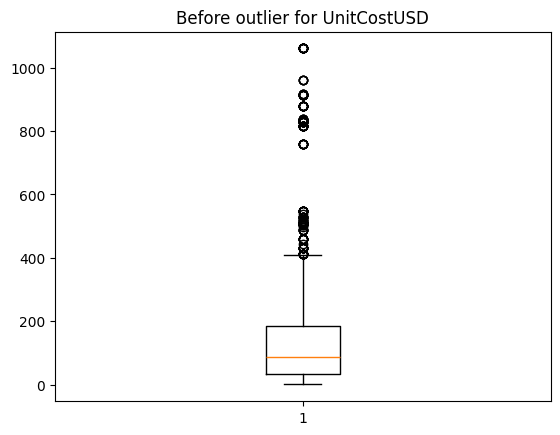

In [16]:
detect_outliers(df,'UnitCostUSD')

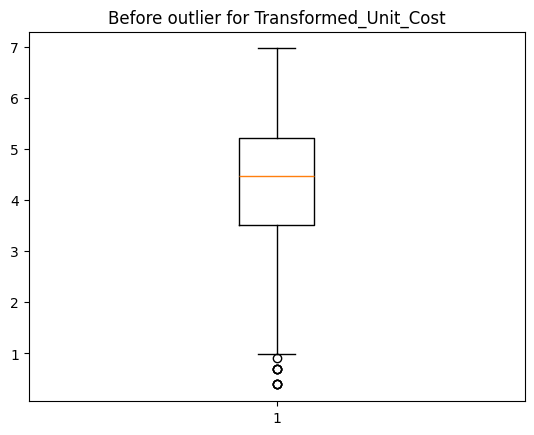

In [17]:
#handling outliers
df['Transformed_Unit_Cost'] = np.log1p(df['UnitCostUSD'])
df['Transformed_Unit_Cost']
detect_outliers(df,'Transformed_Unit_Cost')

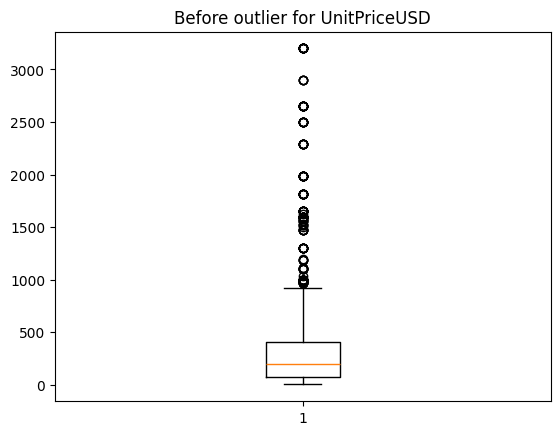

In [18]:
detect_outliers(df,'UnitPriceUSD')

#### Bi Variate Analysis

##### Brand and Price

<BarContainer object of 2517 artists>

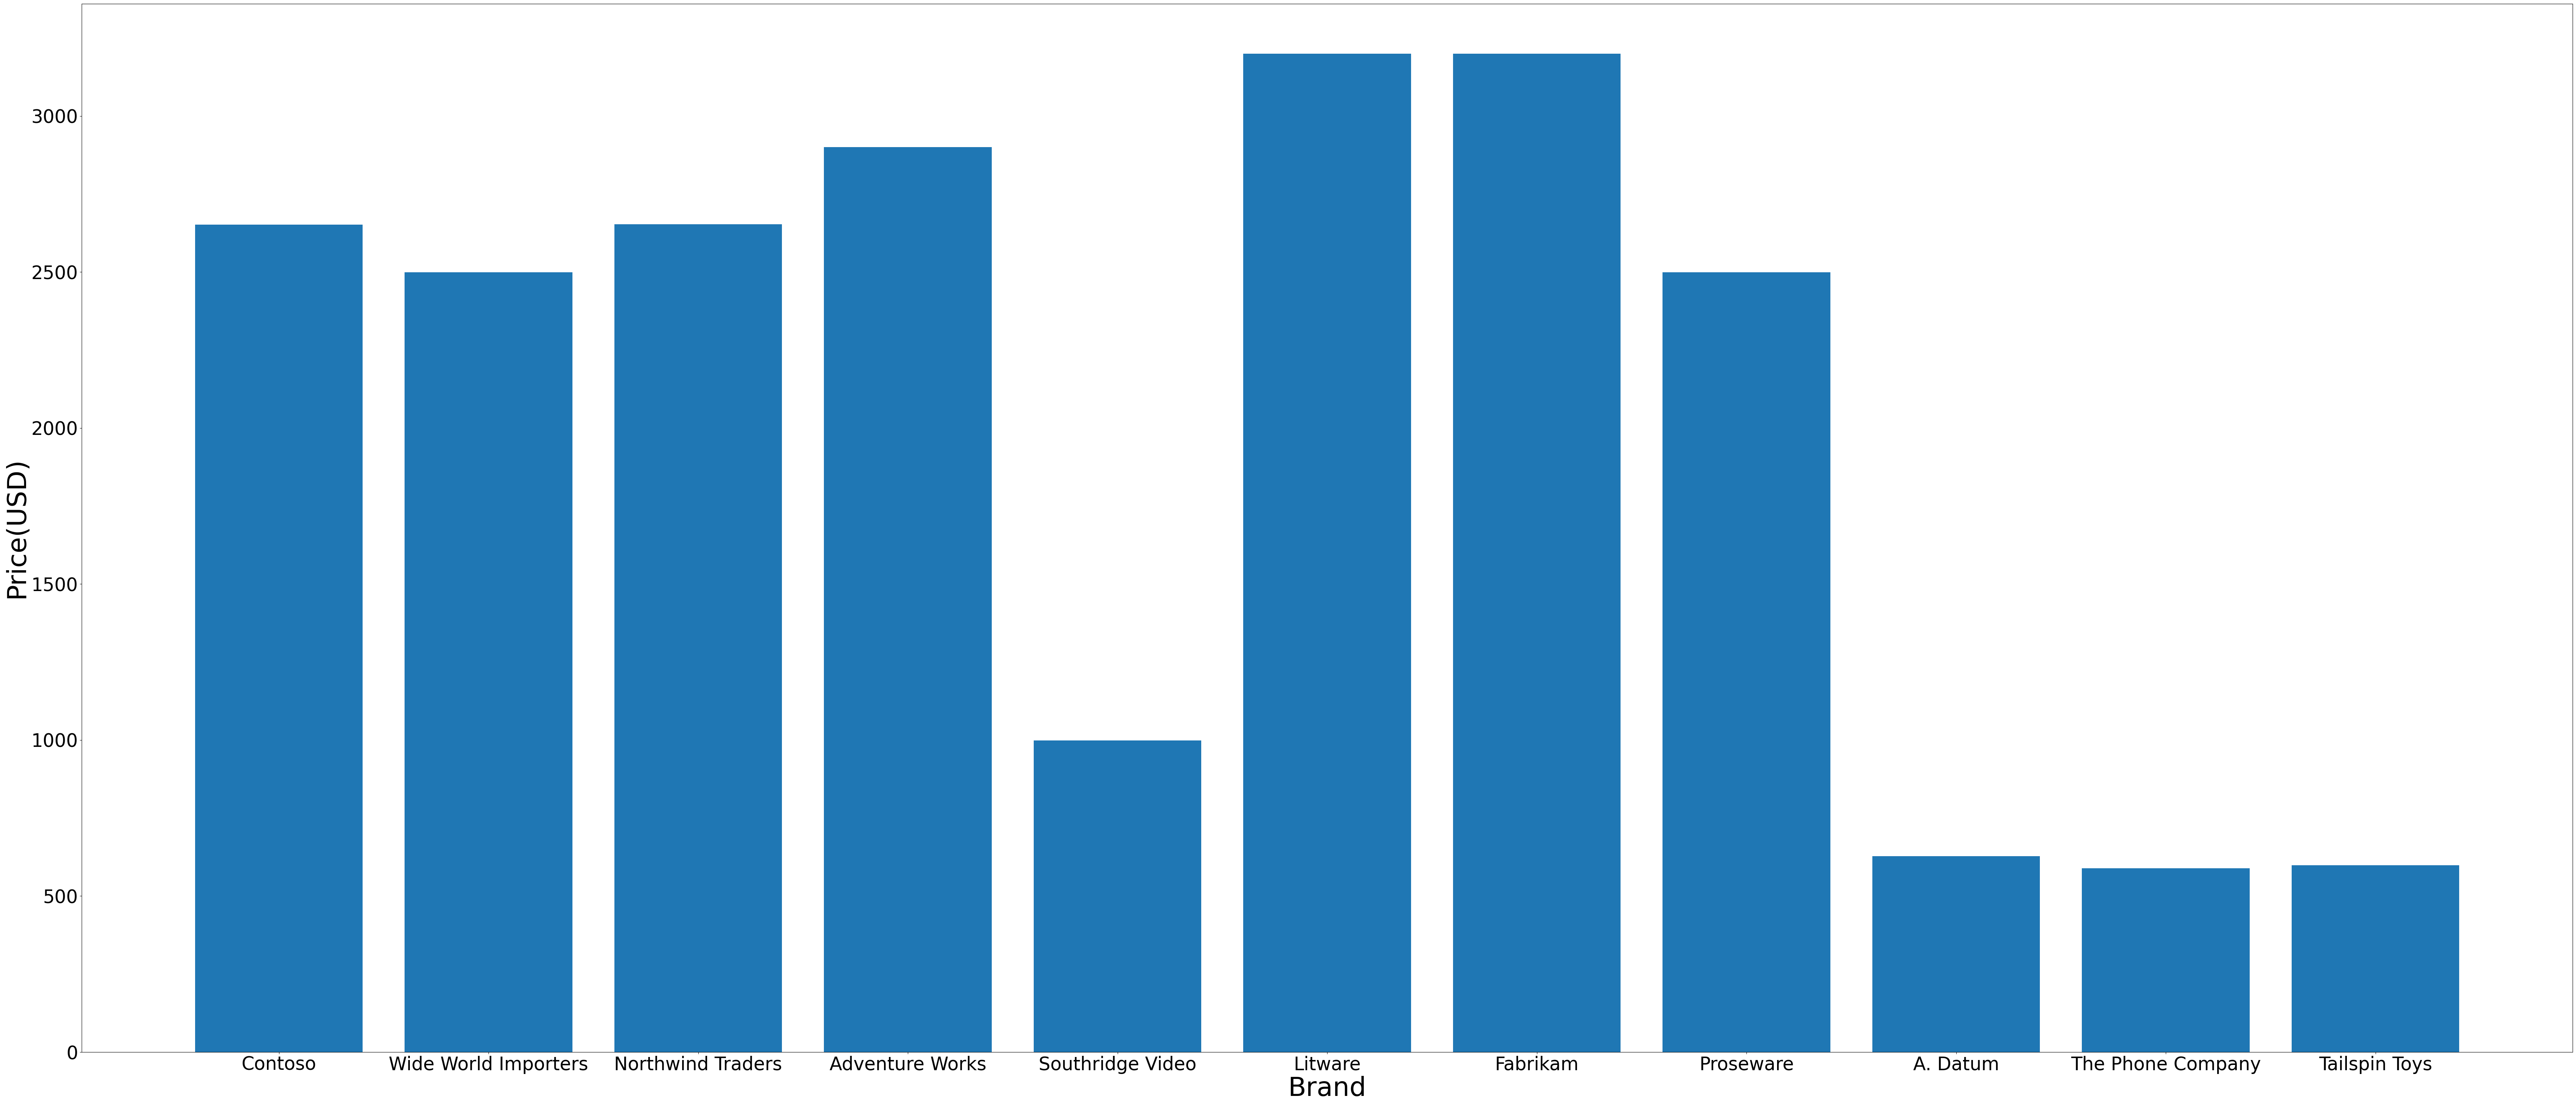

In [19]:
plt.figure(figsize=(85, 36)) 
plt.xlabel('Brand',fontsize =50)
plt.ylabel('Price(USD)',fontsize =50)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.bar(df['Brand'],df['UnitPriceUSD'])


###### litware and Fabrikam produces most expensive items

##### Brand , Category and Count

<Axes: xlabel='Brand', ylabel='Count'>

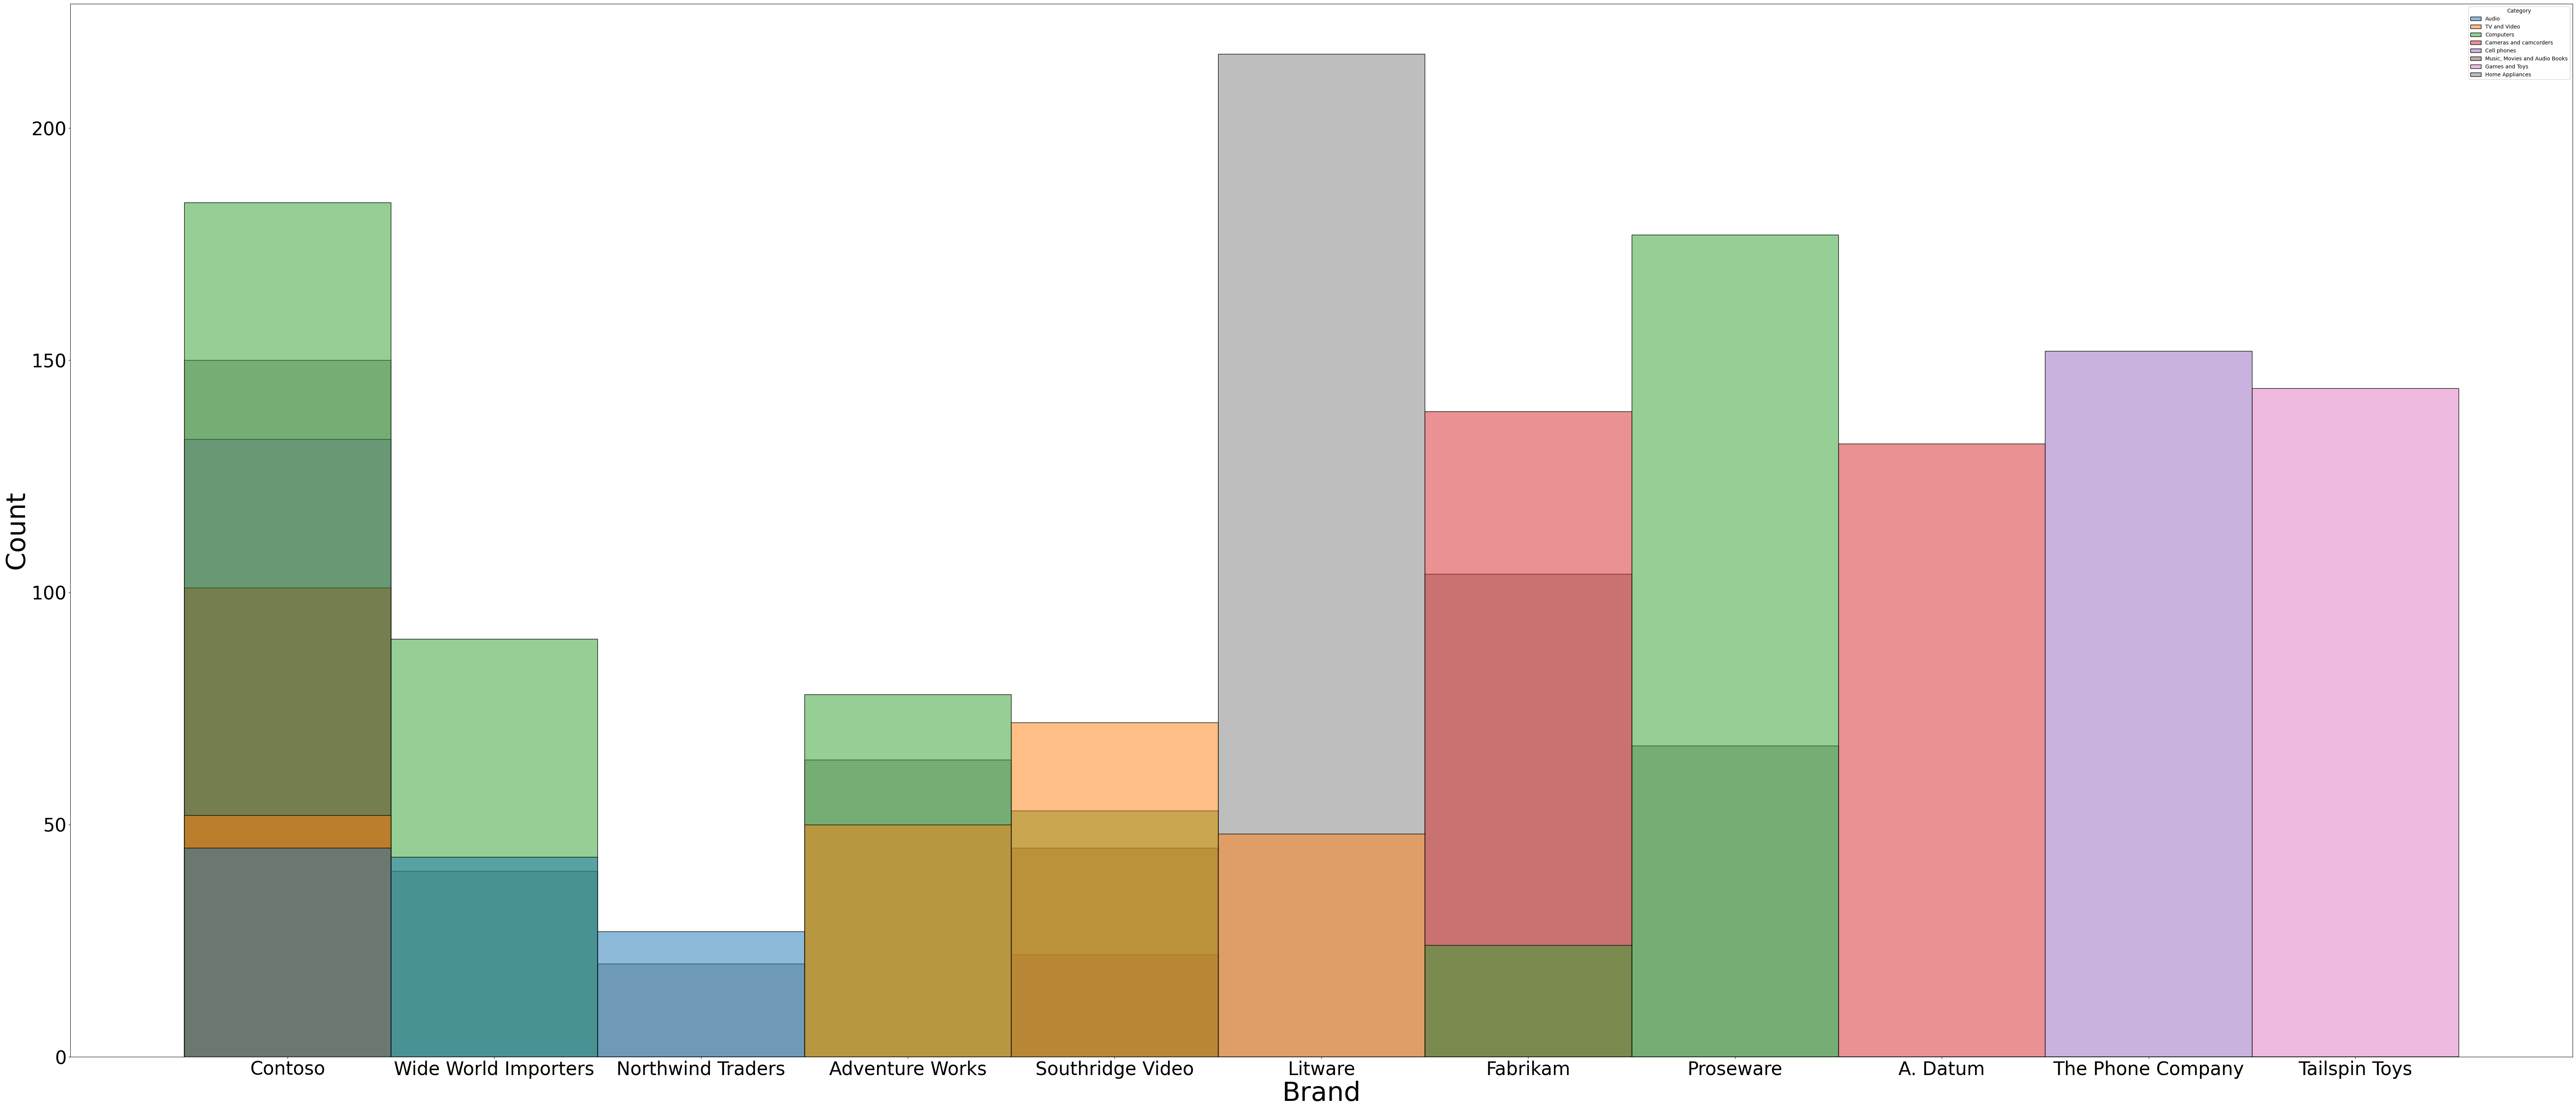

In [20]:
plt.figure(figsize=(85, 36)) 
plt.xlabel('Brand',fontsize =50)
plt.ylabel('Count',fontsize =50)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
sns.histplot(data=df,x="Brand",hue = 'Category' , multiple="layer")


In [21]:

df.to_csv(r"..\processed_data\Products.csv")